`imports`, you've seen this before!


In [1053]:
import matplotlib
import matplotlib.pyplot as plt
import pandas 
import numpy as np
import pandas as pd
import os
from datetime import datetime

Some magic that tells jupyter to put graphs and things in the notebook instead of the default behaviour which is to save it as a file.


In [1054]:
%matplotlib inline

Set the size of the plots that will come out when we ask for them. Annoyingly, these are in inches. Whatever an "inch" is


In [1055]:
plt.rcParams["figure.figsize"] = (10, 5)

In [1056]:
saved_style_state = matplotlib.rcParams.copy()  # give us a style state to go back to

Let's check to see if we've already downloaded the data. It's a big file, so we don't want to do it every time we run the code. Even just loading from file takes a few seconds!

Pandas is pretty smart, it can get data from the internet just as easily as from the file system, it just takes a bit longer.


In [1057]:
spice_path = "ctcsp.xls"
print(pd.ExcelFile(spice_path).sheet_names)

['TableOfContents', 'CTCPcc', 'Coffee', 'Tea', 'Cocoa', 'Spices']


In [1058]:
spice_df = pd.read_excel(spice_path, sheet_name="Coffee")
print("done")
spice_df.head(8)


done


,Coffee: Supply and use1,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Filename: CTCSP,Unnamed: 19
0,Year,"U.S. population, July 12",Supply,NaN,NaN,Nonfood use,NaN,NaN,Food availability4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Production,Imports3,Total supply4,Net change in stocks5,Total use,Exports,Total,Per capita availability,NaN,NaN,Instant,NaN,NaN,NaN,Regular,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Percent of total coffee6,Per capita availability,NaN,NaN,Percent of total coffee6,Per capita availability,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bean equivalent,Retail,NaN,NaN,Bean equiv.,Retail,NaN,NaN,Bean equiv.,Retail,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pounds,Gallons,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,-- Millions --,----------------------------------------- Mill...,NaN,NaN,NaN,NaN,NaN,NaN,------- Pounds -------,NaN,-- Gallons --,-- Percent --,------ Pounds ------,NaN,-- Gallons --,-- Percent --,------ Pounds ------,NaN,-- Gallons --
6,1910,92.407,NaN,800,800,-51,851,3,848,9.176794,7.708507,21.680176,NaN,NaN,NaN,NaN,1,9.176794,7.708507,21.680176
7,1911,93.863,NaN,799,799,12,787,3,784,8.352599,7.016183,19.733015,NaN,NaN,NaN,NaN,1,8.352599,7.016183,19.733015


We can see that row's 0 to 5 have header information in them. Sadly, there's not really an obvious way to make sense of this. It's a bit chaotic. What I'd suggest is that we hand name the columns, but we can get pandas to give us something useful as a starting point. This isn't hard code, but the technique is a but tricky. Let's see if you can follow along:


In [1059]:
def concat_cells(column):
    new_title = ""
    for value in column:
        if isinstance(value, str):
            new_title += f"{value} ".replace("-", "")
    return new_title.strip()


rough_headers = spice_df.head(6)
unedited_headers = list(rough_headers.apply(concat_cells))
unedited_headers

['Year',
 'U.S. population, July 12  Millions',
 'Supply Production  Million pounds',
 'Imports3',
 'Total supply4',
 'Nonfood use Net change in stocks5',
 'Total use',
 'Exports',
 'Food availability4 Total',
 'Per capita availability Bean equivalent  Pounds',
 'Retail Pounds',
 'Gallons  Gallons',
 'Instant Percent of total coffee6  Percent',
 'Per capita availability Bean equiv.  Pounds',
 'Retail',
 'Gallons',
 'Regular Percent of total coffee6  Percent',
 'Per capita availability Bean equiv.  Pounds',
 'Retail',
 'Gallons']

We can't use them straight, because they're a bit rough. But we can clean them up, and re-assign them.

One thing we'll notice is that they come through as duplicates, to we need to differenciate them. Pandas needs the column names to be unique so that we can index into the table and get a column.


In [1060]:
new_headers = [
    "year",
    "us_population",  #  july 12  millions # leave this here, as documentation
    "supply_production",  #  million pounds
    "supply_imports", #imports^3 
    "supply_total_supply", #stocks^4
    "nonfood_use_net_change",  # in stocks5
    "nonfood_use_total_use",
    "nonfood_use_exports",
    "food_availability_total",
    "food_availability_per_capita_availability_bean_equiv",  #  pounds
    "food_availability_per_capita_availability_retail_pounds",
    "food_availability_per_capita_availability_retail_gallons",  #  gallons
    "food_availability_instant_percent_of_total_coffee",  # of total coffee6  percent
    "food_availability_instant_per_capita_availability_bean_equiv",  # .  pounds
    "food_availability_instant_per_capita_availability_retail_pounds",
    "food_availability_instant_per_capita_availability_retail_gallons",
    "food_availability_regular_percent_of_total_coffee",  # 6  percent
    "food_availability_regular_per_capita_availability_bean_equiv",  # .  pounds
    "food_availability_regular_per_capita_availability_retail_pounds",
    "food_availability_regular_per_capita_availability_retail_gallons",
]

In [1061]:
coffee_df = pd.read_excel(
    spice_path,  # The file we're loading up
    sheet_name="Coffee",  # The sheet that we want to read this time
    skiprows=6,  # the number of rows to ignore at the top
    skipfooter=6,  # the number of rows to ignore at the top. It's just a coincidence that they're both 6
    names=new_headers,  # the new column names
)
coffee_df.head(8)

,year,us_population,supply_production,supply_imports,supply_total_supply,nonfood_use_net_change,nonfood_use_total_use,nonfood_use_exports,food_availability_total,food_availability_per_capita_availability_bean_equiv,food_availability_per_capita_availability_retail_pounds,food_availability_per_capita_availability_retail_gallons,food_availability_instant_percent_of_total_coffee,food_availability_instant_per_capita_availability_bean_equiv,food_availability_instant_per_capita_availability_retail_pounds,food_availability_instant_per_capita_availability_retail_gallons,food_availability_regular_percent_of_total_coffee,food_availability_regular_per_capita_availability_bean_equiv,food_availability_regular_per_capita_availability_retail_pounds,food_availability_regular_per_capita_availability_retail_gallons
0,1910,92.407,NaN,800.0,800.0,-51.0,851.0,3.0,848.0,9.176794,7.708507,21.680176,NaN,NaN,NaN,NaN,1.0,9.176794,7.708507,21.680176
1,1911,93.863,NaN,799.0,799.0,12.0,787.0,3.0,784.0,8.352599,7.016183,19.733015,NaN,NaN,NaN,NaN,1.0,8.352599,7.016183,19.733015
2,1912,95.335,NaN,940.0,940.0,-95.0,1035.0,4.0,1031.0,10.814496,9.084177,25.549247,NaN,NaN,NaN,NaN,1.0,10.814496,9.084177,25.549247
3,1913,97.225,NaN,849.0,849.0,-27.0,876.0,4.0,872.0,8.968887,7.533865,21.188995,NaN,NaN,NaN,NaN,1.0,8.968887,7.533865,21.188995
4,1914,99.111,NaN,982.0,982.0,63.0,919.0,5.0,914.0,9.221983,7.746466,21.786936,NaN,NaN,NaN,NaN,1.0,9.221983,7.746466,21.786936
5,1915,100.546,NaN,1141.0,1141.0,70.0,1071.0,7.0,1064.0,10.582221,8.889066,25.000497,NaN,NaN,NaN,NaN,1.0,10.582221,8.889066,25.000497
6,1916,101.961,NaN,1135.0,1135.0,-42.0,1177.0,6.0,1171.0,11.484783,9.647218,27.132801,NaN,NaN,NaN,NaN,1.0,11.484783,9.647218,27.132801
7,1917,103.414,NaN,1219.0,1219.0,-39.0,1258.0,6.0,1252.0,12.106678,10.169610,28.602027,NaN,NaN,NaN,NaN,1.0,12.106678,10.169610,28.602027


In [1062]:
coffee_df["year_dt"] = pd.to_datetime(dict(year=coffee_df.year, month=7, day=1))
coffee_df.set_index("year_dt", inplace=True)
coffee_df.head()

,year,us_population,supply_production,supply_imports,supply_total_supply,nonfood_use_net_change,nonfood_use_total_use,nonfood_use_exports,food_availability_total,food_availability_per_capita_availability_bean_equiv,food_availability_per_capita_availability_retail_pounds,food_availability_per_capita_availability_retail_gallons,food_availability_instant_percent_of_total_coffee,food_availability_instant_per_capita_availability_bean_equiv,food_availability_instant_per_capita_availability_retail_pounds,food_availability_instant_per_capita_availability_retail_gallons,food_availability_regular_percent_of_total_coffee,food_availability_regular_per_capita_availability_bean_equiv,food_availability_regular_per_capita_availability_retail_pounds,food_availability_regular_per_capita_availability_retail_gallons
year_dt,,,,,,,,,,,,,,,,,,,,
1910-07-01,1910,92.407,NaN,800.0,800.0,-51.0,851.0,3.0,848.0,9.176794,7.708507,21.680176,NaN,NaN,NaN,NaN,1.0,9.176794,7.708507,21.680176
1911-07-01,1911,93.863,NaN,799.0,799.0,12.0,787.0,3.0,784.0,8.352599,7.016183,19.733015,NaN,NaN,NaN,NaN,1.0,8.352599,7.016183,19.733015
1912-07-01,1912,95.335,NaN,940.0,940.0,-95.0,1035.0,4.0,1031.0,10.814496,9.084177,25.549247,NaN,NaN,NaN,NaN,1.0,10.814496,9.084177,25.549247
1913-07-01,1913,97.225,NaN,849.0,849.0,-27.0,876.0,4.0,872.0,8.968887,7.533865,21.188995,NaN,NaN,NaN,NaN,1.0,8.968887,7.533865,21.188995
1914-07-01,1914,99.111,NaN,982.0,982.0,63.0,919.0,5.0,914.0,9.221983,7.746466,21.786936,NaN,NaN,NaN,NaN,1.0,9.221983,7.746466,21.786936


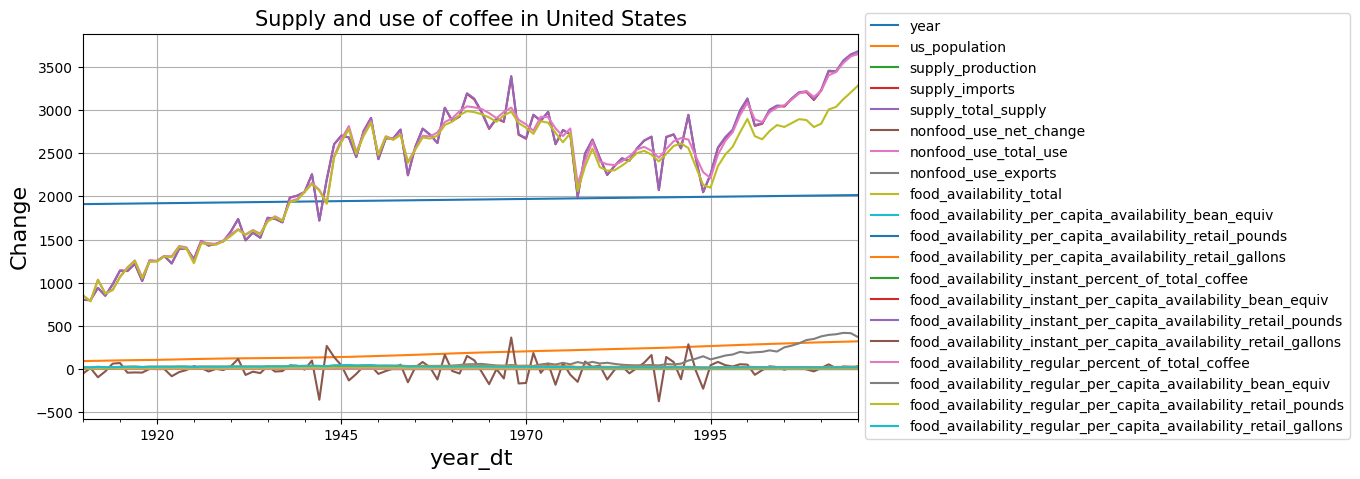

In [1063]:
coffee_df.plot().legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.title("Supply and use of coffee in United States", fontsize=15)
plt.xlabel("year_dt", fontsize=16)
plt.ylabel("Change", fontsize=16)
plt.grid(True)
plt.show() 

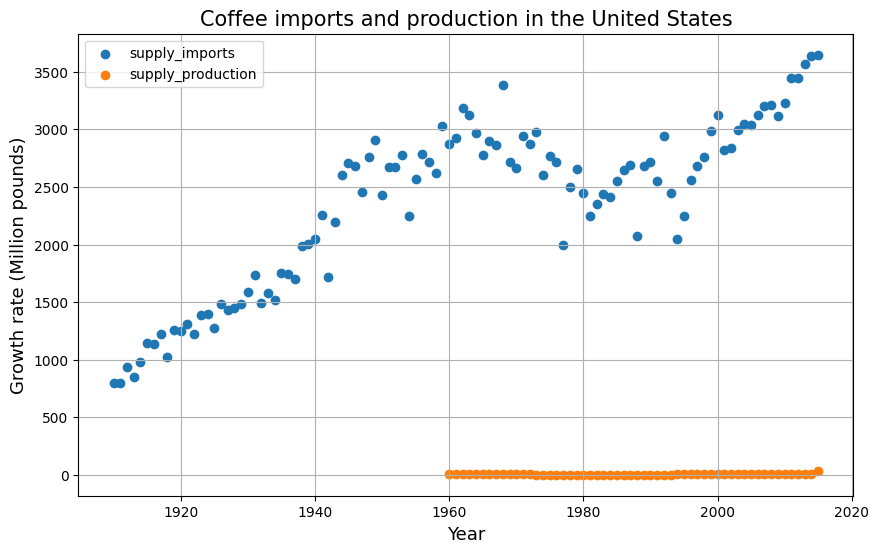

In [1092]:
columns_to_plot = ['supply_imports', 'supply_production']

# Create the scatter plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
for column in columns_to_plot:
    plt.scatter(coffee_df['year'], coffee_df[column], label=column, marker='o')

plt.title("Coffee imports and production in the United States", fontsize=15)
plt.xlabel("Year", fontsize=13)
plt.ylabel("Growth rate (Million pounds)", fontsize=13)
plt.legend()
plt.grid(True)
plt.show()

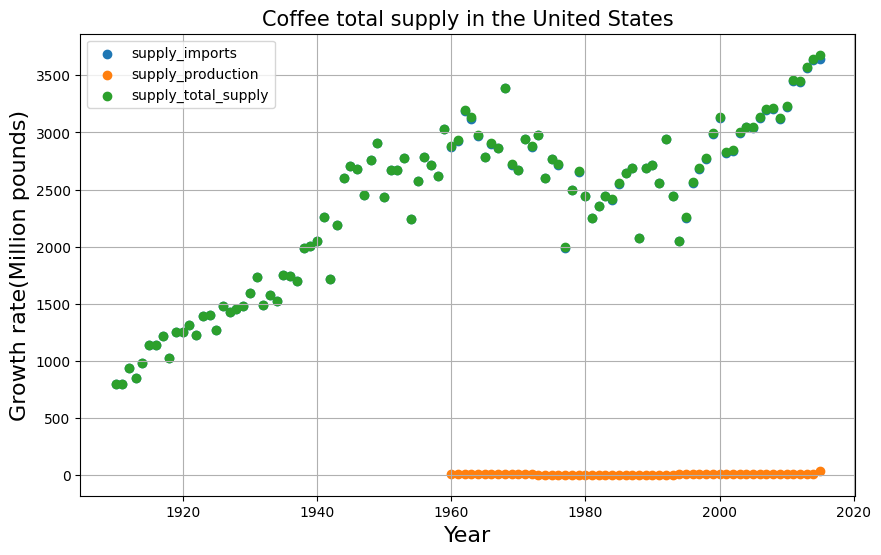

In [1093]:
columns_to_plot = ['supply_imports', 'supply_production', 'supply_total_supply']

# Create the scatter plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
for column in columns_to_plot:
    plt.scatter(coffee_df['year'], coffee_df[column], label=column, marker='o')

plt.title("Coffee total supply in the United States", fontsize=15)
plt.xlabel("Year", fontsize=16)
plt.ylabel("Growth rate(Million pounds)", fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

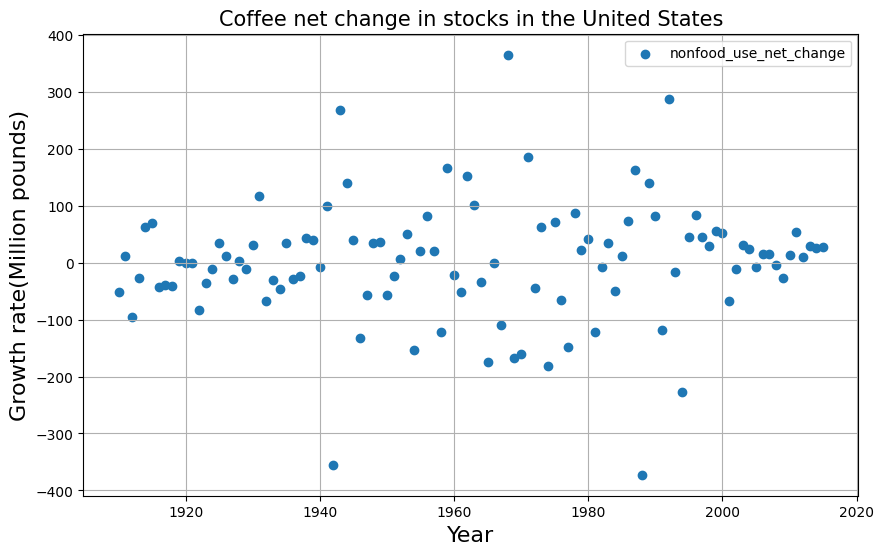

In [1094]:
columns_to_plot = ['nonfood_use_net_change']

# Create the scatter plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
for column in columns_to_plot:
    plt.scatter(coffee_df['year'], coffee_df[column], label=column, marker='o')

plt.title("Coffee net change in stocks in the United States", fontsize=15)
plt.xlabel("Year", fontsize=16)
plt.ylabel("Growth rate(Million pounds)", fontsize=16)
plt.legend()
plt.grid(True)
plt.show() 

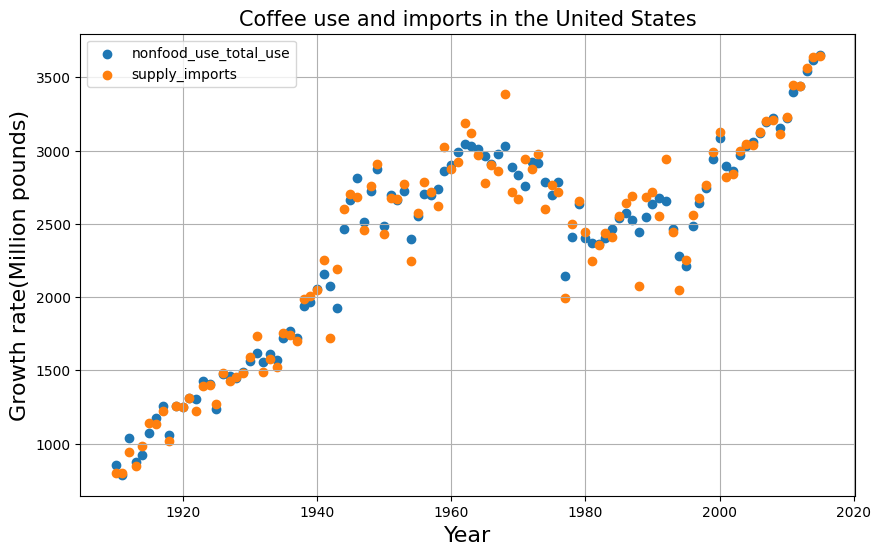

In [1096]:
columns_to_plot = ['nonfood_use_total_use', 'supply_imports']

# Create the scatter plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
for column in columns_to_plot:
    plt.scatter(coffee_df['year'], coffee_df[column], label=column, marker='o')

plt.title("Coffee use and imports in the United States", fontsize=15)
plt.xlabel("Year", fontsize=16)
plt.ylabel("Growth rate(Million pounds)", fontsize=16)
plt.legend()
plt.grid(True)
plt.show() 

Now this is going to present the 'tea' graph  

In [1068]:
plt.rcParams["figure.figsize"] = (10, 5)


In [1069]:
saved_style_state = matplotlib.rcParams.copy() 

In [1070]:
spice_df = pd.read_excel(spice_path, sheet_name="Tea")
print("done")
spice_df.head(8) 

done


,Tea: Supply and use1,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Filename: CTCSP,Unnamed: 10
0,Year,"U.S. population, July 12",Supply,NaN,NaN,Nonfood use,NaN,NaN,Food availability3,NaN,NaN
1,NaN,NaN,Production,Imports,Total supply3,Net change in stocks4,Total use,Exports,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Total,Per capita availability,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pounds,Gallons
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,-- Millions --,----------------------------------------------...,NaN,NaN,NaN,NaN,NaN,NaN,-- Pounds --,-- Gallons --
6,1909,90.49,NaN,103,103,0,103,NaN,103,1.138247,10.671069
7,1910,92.407,NaN,95,95,0,95,NaN,95,1.028061,9.638069


In [1071]:
def concat_cells(column):
    new_title = ""
    for value in column:
        if isinstance(value, str):
            new_title += f"{value} ".replace("-", "")
    return new_title.strip()

rough_headers = spice_df.head(6)
unedited_headers = list(rough_headers.apply(concat_cells))
unedited_headers


['Year',
 'U.S. population, July 12  Millions',
 'Supply Production  Million pounds',
 'Imports',
 'Total supply3',
 'Nonfood use Net change in stocks4',
 'Total use',
 'Exports',
 'Food availability3 Total',
 'Per capita availability Pounds  Pounds',
 'Gallons  Gallons']

In [1072]:
new_headers = [
    "year",
    "us_population",  
    "supply_production",  
    "supply_imports",
    "supply_total_supply",
    "nonfood_use_net_change",  # in stocks5
    "nonfood_use_total_use",
    "nonfood_use_exports",
    "food_availability_total",
    "food_availability_per_capita_availability_pounds",
    "food_availability_per_capita_availability_gallons",  #  gallons
]

In [1073]:
tea_df = pd.read_excel(
    spice_path,  # The file we're loading up
    sheet_name="Tea",  # The sheet that we want to read this time
    skiprows=6,  # the number of rows to ignore at the top
    skipfooter=7,  
    names=new_headers,  # the new column names
)
tea_df.tail(8) 


,year,us_population,supply_production,supply_imports,supply_total_supply,nonfood_use_net_change,nonfood_use_total_use,nonfood_use_exports,food_availability_total,food_availability_per_capita_availability_pounds,food_availability_per_capita_availability_gallons
99,2008,304.797761,NaN,366.622660,366.622660,7.701523,358.921136,65.532750,293.388386,0.962567,9.024069
100,2009,307.439406,NaN,362.527397,362.527397,0.497062,362.030335,67.150761,294.879573,0.959147,8.992003
101,2010,309.766670,NaN,387.492681,387.492681,3.294962,384.197719,79.433259,304.764459,0.983852,9.223610
102,2011,312.138672,NaN,402.387012,402.387012,1.599322,400.787691,91.225267,309.562424,0.991746,9.297623
103,2012,314.334945,NaN,395.174566,395.174566,-4.068703,399.243269,101.886954,297.356315,0.945986,8.868615
104,2013,316.505959,NaN,391.596458,391.596458,-4.547001,396.143459,112.428146,283.715313,0.896398,8.403731
105,2014,318.839403,NaN,384.892718,384.892718,-2.812685,387.705403,112.428146,275.277257,0.863373,8.094120
106,2015,321.132158,NaN,393.361521,393.361521,2.608160,390.753362,107.651626,283.101736,0.881574,8.264756


In [1074]:

tea_df["year_dt"] = pd.to_datetime(dict(year=tea_df.year, month=7, day=1))
tea_df.set_index("year_dt", inplace=True)
tea_df.head()

,year,us_population,supply_production,supply_imports,supply_total_supply,nonfood_use_net_change,nonfood_use_total_use,nonfood_use_exports,food_availability_total,food_availability_per_capita_availability_pounds,food_availability_per_capita_availability_gallons
year_dt,,,,,,,,,,,
1909-07-01,1909,90.490,NaN,103.0,103.0,0.0,103.0,NaN,103.0,1.138247,10.671069
1910-07-01,1910,92.407,NaN,95.0,95.0,0.0,95.0,NaN,95.0,1.028061,9.638069
1911-07-01,1911,93.863,NaN,102.0,102.0,0.0,102.0,NaN,102.0,1.086690,10.187720
1912-07-01,1912,95.335,NaN,98.0,98.0,0.0,98.0,NaN,98.0,1.027954,9.637069
1913-07-01,1913,97.225,NaN,88.0,88.0,0.0,88.0,NaN,88.0,0.905117,8.485472


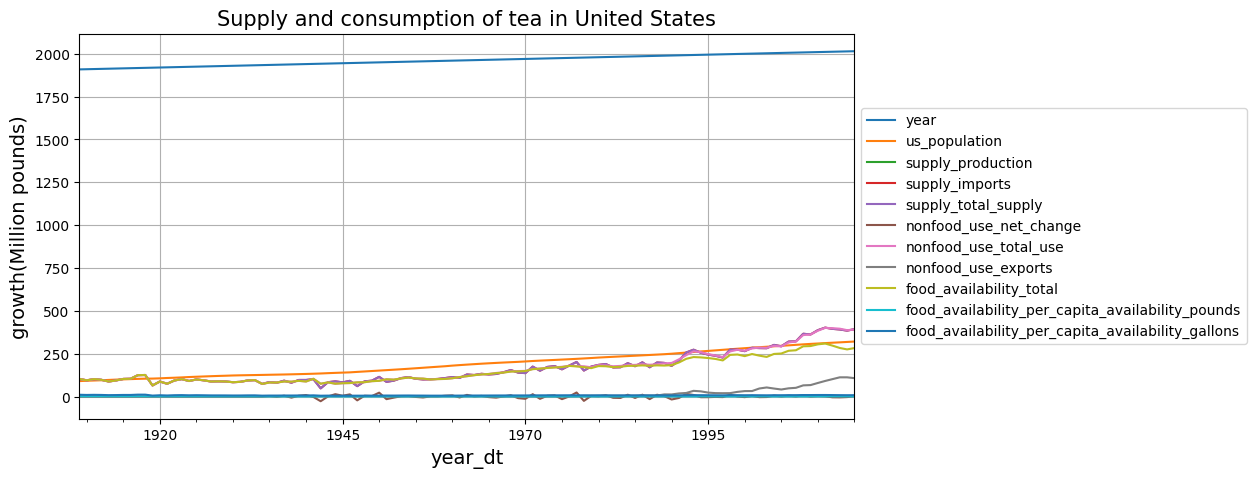

In [1075]:
tea_df.plot().legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.title("Supply and consumption of tea in United States", fontsize=15)
plt.xlabel("year_dt", fontsize=14)
plt.ylabel("growth(Million pounds)", fontsize=14)
plt.grid(True)
plt.show() 


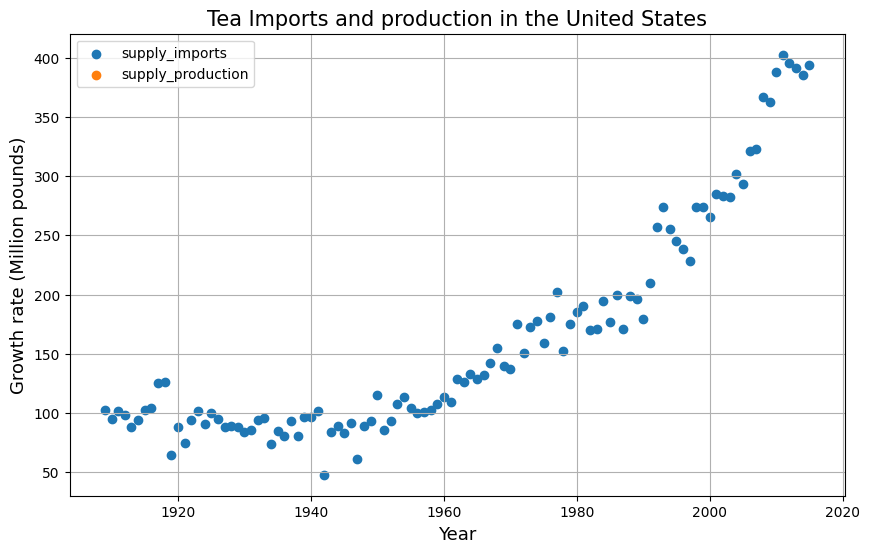

In [1098]:
columns_to_plot = ['supply_imports', 'supply_production']

plt.figure(figsize=(10, 6)) 
for column in columns_to_plot:
    plt.scatter(tea_df['year'], tea_df[column], label=column, marker='o')

plt.title("Tea Imports and production in the United States", fontsize=15)
plt.xlabel("Year", fontsize=13)
plt.ylabel("Growth rate (Million pounds)", fontsize=13)
plt.legend()
plt.grid(True)
plt.show()

Now im going to present the graph related to cocoa use and consumption in United States 

In [1077]:
plt.rcParams["figure.figsize"] = (10, 5)

In [1078]:
saved_style_state = matplotlib.rcParams.copy()  

In [1079]:
spice_df = pd.read_excel(spice_path, sheet_name="Cocoa")
print("done")
spice_df.head(8) 

done


,Cocoa: Supply and use1,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Filename: CTCSP,Unnamed: 10
0,Year,"U.S. population, July 12",Supply,NaN,NaN,Nonfood use,NaN,NaN,Food availability3,NaN,NaN
1,NaN,NaN,Production,Imports,Total supply3,Net change in stocks4,Total use,Exports,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Total,Per capita availability,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bean equivalent,Chocolate liquor5
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,-- Millions --,----------------------------------------------...,NaN,NaN,NaN,NaN,NaN,NaN,-------- Pounds --------,NaN
6,1909,90.49,NaN,121,121,0,121,NaN,121,1.337164,0.98549
7,1910,92.407,NaN,114,114,0,114,NaN,114,1.233673,0.909217


In [1080]:
def concat_cells(column):
    new_title = ""
    for value in column:
        if isinstance(value, str):
            new_title += f"{value} ".replace("-", "")
    return new_title.strip()


rough_headers = spice_df.head(6)
unedited_headers = list(rough_headers.apply(concat_cells))
unedited_headers 

['Year',
 'U.S. population, July 12  Millions',
 'Supply Production  Million pounds',
 'Imports',
 'Total supply3',
 'Nonfood use Net change in stocks4',
 'Total use',
 'Exports',
 'Food availability3 Total',
 'Per capita availability Bean equivalent  Pounds',
 'Chocolate liquor5']

In [1081]:
new_headers = [
    "year",
    "us_population",  #  july 1^2  millions # leave this here, as documentation
    "supply_production",  #  million pounds
    "supply_imports",
    "supply_total_supply", # in supply^3
    "nonfood_use_net_change",  # in stocks4
    "nonfood_use_total_use", 
    "nonfood_use_exports",
    "food_availability_total",
    "food_availability_per_capita_availability_bean_equivalent",
    "food_availability_per_capita_availability_Chocolate_liquor",  #  pounds
]

In [1082]:
cocoa_df = pd.read_excel(
    spice_path,  # The file we're loading up
    sheet_name="Cocoa",  # The sheet that we want to read this time
    skiprows=7,  # the number of rows to ignore at the top
    skipfooter=8,  # the number of rows to ignore at the top. It's just a coincidence that they're both 6
    names=new_headers,  # the new column names
)
cocoa_df.tail(9)  

,year,us_population,supply_production,supply_imports,supply_total_supply,nonfood_use_net_change,nonfood_use_total_use,nonfood_use_exports,food_availability_total,food_availability_per_capita_availability_bean_equivalent,food_availability_per_capita_availability_Chocolate_liquor
97,2007,302.003917,NaN,2027.767273,2027.767273,-190.795535,2218.562807,421.620662,1796.942145,5.950062,4.760050
98,2008,304.797761,NaN,2036.628279,2036.628279,-143.593497,2180.221776,479.008629,1701.213147,5.581449,4.465159
99,2009,307.439406,NaN,2165.420643,2165.420643,7.619275,2157.801368,451.508704,1706.292664,5.550013,4.440010
100,2010,309.766670,NaN,2185.327694,2185.327694,-14.351725,2199.679419,502.954572,1696.724847,5.477429,4.381943
101,2011,312.138672,NaN,2341.566301,2341.566301,31.490516,2310.075784,592.357260,1717.718525,5.503062,4.402450
102,2012,314.334945,NaN,2163.297035,2163.297035,-102.609051,2265.906086,616.593595,1649.312491,5.246991,4.197592
103,2013,316.505959,NaN,2283.277248,2283.277248,31.003209,2252.274039,582.292742,1669.981297,5.276303,4.221042
104,2014,318.839403,NaN,2263.847432,2263.847432,-40.580740,2304.428172,661.500702,1642.927470,5.152837,4.122270
105,2015,321.132158,NaN,2391.316250,2391.316250,106.497970,2284.818280,570.892163,1713.926117,5.337136,4.269709


In [1083]:
cocoa_df.columns 

Index(['year', 'us_population', 'supply_production', 'supply_imports',
       'supply_total_supply', 'nonfood_use_net_change',
       'nonfood_use_total_use', 'nonfood_use_exports',
       'food_availability_total',
       'food_availability_per_capita_availability_bean_equivalent',
       'food_availability_per_capita_availability_Chocolate_liquor'],
      dtype='object')

In [1084]:
cocoa_df["year_dt"] = pd.to_datetime (dict(year=cocoa_df.year, month=7, day=2))
cocoa_df.drop(['year'], axis=1, inplace=True, errors="ignore")
cocoa_df.set_index("year_dt", inplace=True)
cocoa_df.head()

,us_population,supply_production,supply_imports,supply_total_supply,nonfood_use_net_change,nonfood_use_total_use,nonfood_use_exports,food_availability_total,food_availability_per_capita_availability_bean_equivalent,food_availability_per_capita_availability_Chocolate_liquor
year_dt,,,,,,,,,,
1910-07-02,92.407,NaN,114.0,114.0,0.0,114.0,NaN,114.0,1.233673,0.909217
1911-07-02,93.863,NaN,133.0,133.0,0.0,133.0,NaN,133.0,1.416959,1.044299
1912-07-02,95.335,NaN,150.0,150.0,0.0,150.0,NaN,150.0,1.573399,1.159595
1913-07-02,97.225,NaN,152.0,152.0,0.0,152.0,NaN,152.0,1.563384,1.152214
1914-07-02,99.111,NaN,167.0,167.0,0.0,167.0,NaN,167.0,1.684979,1.241830


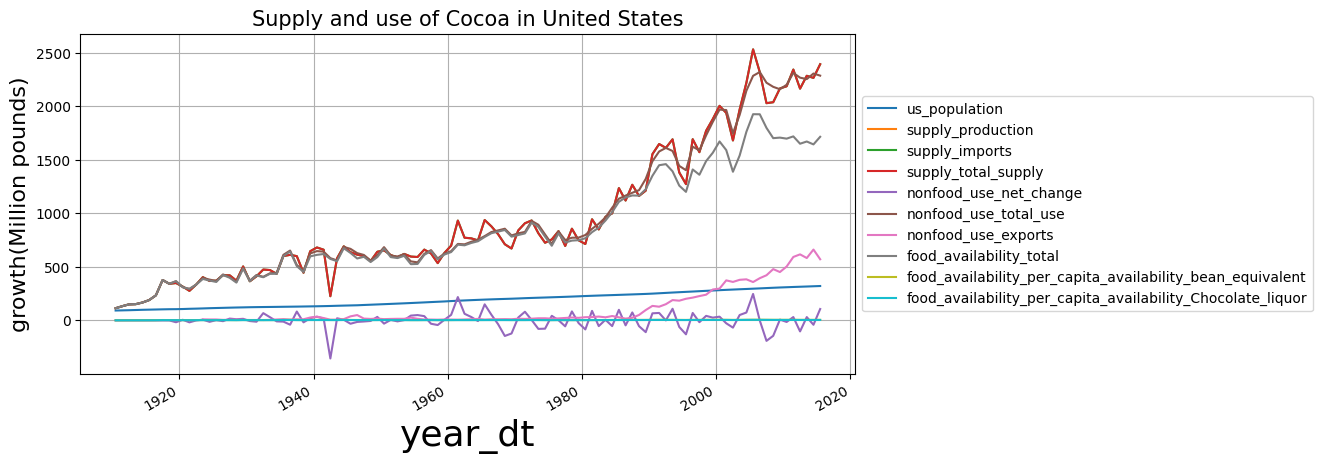

In [1085]:
cocoa_df.plot().legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.title("Supply and use of Cocoa in United States", fontsize=15)
plt.xlabel("year_dt", fontsize=26)
plt.ylabel("growth(Million pounds)", fontsize=16)
plt.grid(True)
plt.show() 

the next graph is for spices 

In [ ]:
plt.rcParams["figure.figsize"] = (10, 5)

In [ ]:
saved_style_state = matplotlib.rcParams.copy() 

In [ ]:
spice_df = pd.read_excel(spice_path, sheet_name="Spices")
print("done")
spice_df.head(8) 

done


,Spices: Supply and use,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Spices: Supply and disappearance,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Filename: CTCSP.2,Unnamed: 36
0,Year,"U.S. population, July 11",Production,NaN,NaN,NaN,NaN,Supply,NaN,NaN,...,Supply--continued,NaN,NaN,NaN,NaN,Use,NaN,NaN,Food availability,NaN
1,NaN,NaN,Mustard seed2,Dried chili peppers,NaN,NaN,Total production,Imports4,NaN,NaN,...,Imports--continued4,NaN,NaN,NaN,NaN,Total,Exports,Net shipments to Puerto Rico,NaN,NaN
2,NaN,NaN,NaN,California,New Mexico,Total3,NaN,Anise seed,Caraway seed,Fennel seed,...,Sesame seed,Turmeric,Vanilla beans,Other spices8,Total imports,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Total,Per capita availability
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,-- Millions --,----------------------------------------------...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,----------------------------------------------...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-- Pounds --
6,1966,196.56,22603,12560,2500,15060,37663,266,7150,765,...,28202,3794,1852,8179,212749,250412,8053,608,241751,1.229909
7,1967,198.712,22520,12680,5000,17680,40200,548,6838,921,...,35854,1925,1282,7728,249499,289699,6365,813,282521,1.421761


In [ ]:
def concat_cells(column):
    new_title = ""
    for value in column:
        if isinstance(value, str):
            new_title += f"{value} ".replace("-", "")
    return new_title.strip()


rough_headers = spice_df.head(6)
unedited_headers = list(rough_headers.apply(concat_cells))
unedited_headers 

['Year',
 'U.S. population, July 11  Millions',
 'Production Mustard seed2  1,000 pounds',
 'Dried chili peppers California',
 'New Mexico',
 'Total3',
 'Total production',
 'Supply Imports4 Anise seed',
 'Caraway seed',
 'Fennel seed',
 'Anise seed, caraway seed, and fennel seed',
 'Dried capsicum peppers',
 'Cassia5',
 'Celery seed',
 'Cinnamon',
 'Cloves6',
 'Coriander seed',
 'Supplycontinued Importscontinued4 Cumin seed  1,000 pounds',
 'Ginger root',
 'Mace',
 'Mustard seed',
 'Nutmeg',
 'Paprika',
 'Pepper, black and white',
 'Pimento (allspice)',
 'Poppy seed',
 'Sage',
 'Supplycontinued Importscontinued4 Sesame seed  1,000 pounds',
 'Turmeric',
 'Vanilla beans',
 'Other spices8',
 'Total imports',
 'Use Total',
 'Exports',
 'Net shipments to Puerto Rico',
 'Food availability Total',
 'Per capita availability  Pounds']

In [ ]:
new_headers = [
    "year",
    "us_population",  
    "production_mustardseed ", 
    "production_driedchillipeppers_california",
    "production_driedchillipeppers_newmexico",
    "production_driedchillipeppers_total", 
    "totalproduction",
    "supply_imports_aniseseed",
    "supply_imports_carawayseed",
    "supply_imports_fennelseed",
    "supply_imports_Aniseseed,caraway seed,and fennel seed",
    "supply_imports_driedcapsicumpeppers",
    "supply_imports_cassia",
    "supply_imports_celeryseed",
    "supply_imports_cinnamon",
    "supply_imports_cloves",
    "supply_imports_corianderseed",
    "supply_imports_cuminseed",
    "supply_imports_gingerroot",
    "supply_imports_mace",
    "supply_imports_mustard",
    "supply_imports_mustardseed",
    "supply_imports_nutmeg",
    "supply_imports_paprika",
    "supply_imports_pepper,black,white",
    "supply_imports_poppyseed",
    "supply_imports_sage",
    "supply_imports_sesameseed",
    "supply_imports_turmeric",
    "supply_imports_vanillabeans",
    "supply_imports_otherspices",
    "supply_imports_total imports",
    "use_total",
    "use_exports",
    "use_Net Shipments To PuertoRico",
    "Food availability_total",
    "Food availability_percapita availability",
]

In [ ]:
spice_df = pd.read_excel(
    spice_path,  # The file we're loading up
    sheet_name="Spices",  # The sheet that we want to read this time
    skiprows=6,  # the number of rows to ignore at the top
    skipfooter=5,  # the number of rows to ignore at the top. It's just a coincidence that they're both  
    names=new_headers,  # the new column names
)
spice_df.head(7)

,year,us_population,production_mustardseed,production_driedchillipeppers_california,production_driedchillipeppers_newmexico,production_driedchillipeppers_total,totalproduction,supply_imports_aniseseed,supply_imports_carawayseed,supply_imports_fennelseed,...,supply_imports_sesameseed,supply_imports_turmeric,supply_imports_vanillabeans,supply_imports_otherspices,supply_imports_total imports,use_total,use_exports,use_Net Shipments To PuertoRico,Food availability_total,Food availability_percapita availability
0,1966,196.560,22603,12560.0,2500.0,15060.0,37663.0,266,7150,765,...,28202.0,3794.0,1852.0,8179.0,212749.0,250412.0,8053.0,608.0,241751.0,1.229909
1,1967,198.712,22520,12680.0,5000.0,17680.0,40200.0,548,6838,921,...,35854.0,1925.0,1282.0,7728.0,249499.0,289699.0,6365.0,813.0,282521.0,1.421761
2,1968,200.706,20512,16320.0,7500.0,23820.0,44332.0,369,7669,974,...,33993.0,3384.0,2160.0,7459.0,250154.0,294486.0,6792.0,1309.0,286385.0,1.426888
3,1969,202.677,25277,14280.0,10000.0,24280.0,49557.0,553,6435,923,...,38818.0,3126.0,1903.0,7124.0,246456.0,296013.0,6799.0,1263.0,287951.0,1.420738
4,1970,205.052,27126,16780.0,12500.0,29280.0,56406.0,350,7424,978,...,42661.0,4214.0,2239.0,9730.0,270597.0,327003.0,7956.0,1089.0,317958.0,1.550621
5,1971,207.661,28976,12560.0,15000.0,27560.0,56536.0,540,6099,1235,...,45442.0,3137.0,1855.0,7844.0,292257.0,348793.0,5575.0,1154.0,342064.0,1.647223
6,1972,209.896,30825,19480.0,17500.0,36980.0,67805.0,740,7292,1251,...,47220.0,3413.0,2366.0,9700.0,312211.0,380016.0,6730.0,1000.0,372286.0,1.773669


In [ ]:
spice_df["year_dt"] = pd.to_datetime(dict(year=spice_df.year, month=7, day=1))
spice_df.set_index("year_dt", inplace=True)
spice_df.head()

,year,us_population,production_mustardseed,production_driedchillipeppers_california,production_driedchillipeppers_newmexico,production_driedchillipeppers_total,totalproduction,supply_imports_aniseseed,supply_imports_carawayseed,supply_imports_fennelseed,...,supply_imports_sesameseed,supply_imports_turmeric,supply_imports_vanillabeans,supply_imports_otherspices,supply_imports_total imports,use_total,use_exports,use_Net Shipments To PuertoRico,Food availability_total,Food availability_percapita availability
year_dt,,,,,,,,,,,,,,,,,,,,,
1966-07-01,1966,196.560,22603,12560.0,2500.0,15060.0,37663.0,266,7150,765,...,28202.0,3794.0,1852.0,8179.0,212749.0,250412.0,8053.0,608.0,241751.0,1.229909
1967-07-01,1967,198.712,22520,12680.0,5000.0,17680.0,40200.0,548,6838,921,...,35854.0,1925.0,1282.0,7728.0,249499.0,289699.0,6365.0,813.0,282521.0,1.421761
1968-07-01,1968,200.706,20512,16320.0,7500.0,23820.0,44332.0,369,7669,974,...,33993.0,3384.0,2160.0,7459.0,250154.0,294486.0,6792.0,1309.0,286385.0,1.426888
1969-07-01,1969,202.677,25277,14280.0,10000.0,24280.0,49557.0,553,6435,923,...,38818.0,3126.0,1903.0,7124.0,246456.0,296013.0,6799.0,1263.0,287951.0,1.420738
1970-07-01,1970,205.052,27126,16780.0,12500.0,29280.0,56406.0,350,7424,978,...,42661.0,4214.0,2239.0,9730.0,270597.0,327003.0,7956.0,1089.0,317958.0,1.550621


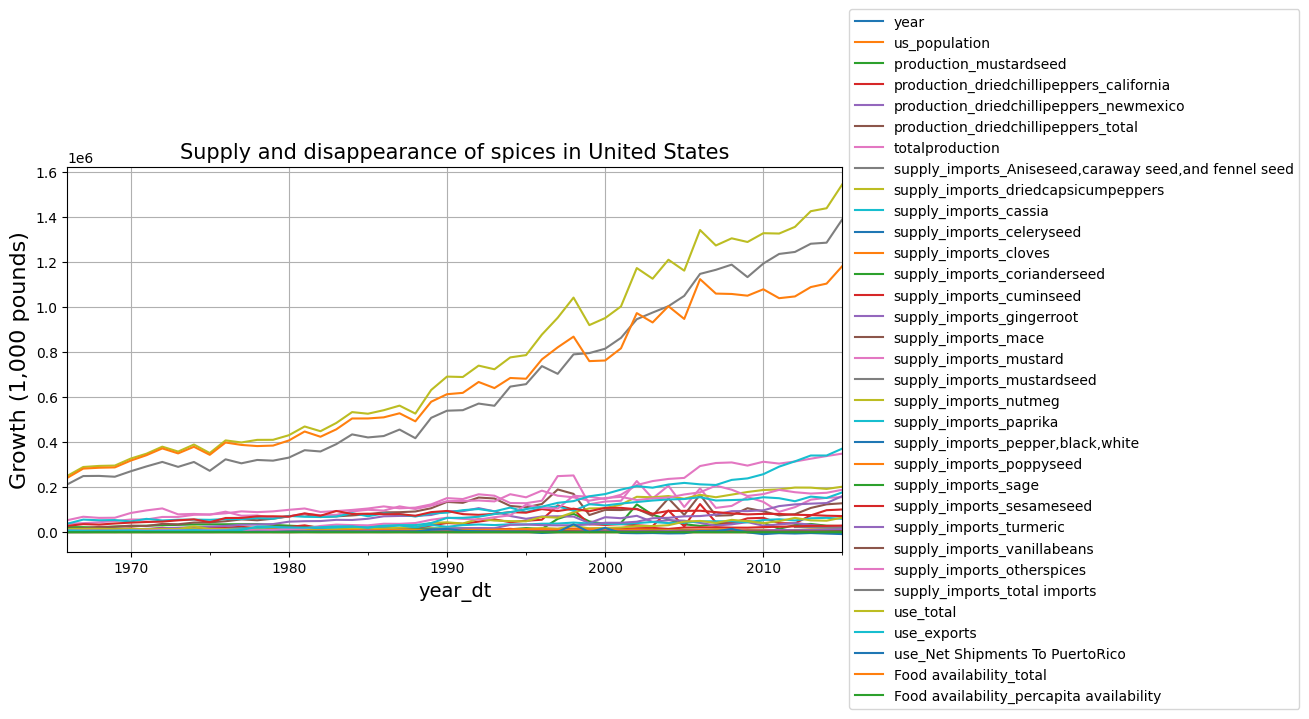

In [ ]:
spice_df.plot().legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.title("Supply and disappearance of spices in United States", fontsize=15)
plt.xlabel("year_dt", fontsize=14)
plt.ylabel("Growth (1,000 pounds)", fontsize=16)
plt.grid(True)
plt.show() 

That was the original plot for all sub titles of this data sheet. 

To make it easier to unpack I will show you two separate plot graphs that separate these into two different sections.

In [ ]:
spice_df["year_dt"] = pd.to_datetime(dict(year=spice_df.year, month=7, day=1))
spice_df.drop(['year'], axis=1, inplace=True, errors="ignore")
spice_df.drop(['us_population'], axis=1, inplace=True, errors="ignore")
spice_df.drop(['production_driedchillipeppers_total'], axis=1, inplace=True, errors="ignore")
spice_df.drop(['totalproduction'], axis=1, inplace=True, errors="ignore")
spice_df.drop(['supply_imports_aniseseed'], axis=1, inplace=True, errors="ignore")
spice_df.drop(['supply_imports_carawayseed'], axis=1, inplace=True, errors="ignore")
spice_df.drop(['supply_imports_fennelseed'], axis=1, inplace=True, errors="ignore")
spice_df.drop(['supply_imports_Aniseseed,caraway seed,and fennel seed'], axis=1, inplace=True, errors="ignore")
spice_df.drop(['supply_imports_driedcapsicumpeppers'], axis=1, inplace=True, errors="ignore")
spice_df.drop(['supply_imports_cassia'], axis=1, inplace=True, errors="ignore")
spice_df.drop(['supply_imports_celeryseed'], axis=1, inplace=True, errors="ignore")
spice_df.drop(['supply_imports_cinnamon'], axis=1, inplace=True, errors="ignore")
spice_df.drop(['supply_imports_cloves'], axis=1, inplace=True, errors="ignore")
spice_df.drop(['supply_imports_corianderseed'], axis=1, inplace=True, errors="ignore")
spice_df.drop(['supply_imports_cuminseed'], axis=1, inplace=True, errors="ignore")
spice_df.drop(['supply_imports_gingerroot'], axis=1, inplace=True, errors="ignore")
spice_df.drop(['supply_imports_cuminseed'], axis=1, inplace=True, errors="ignore")
spice_df.drop(['supply_imports_mace'], axis=1, inplace=True, errors="ignore")
spice_df.drop(['supply_imports_gingerroot'], axis=1, inplace=True, errors="ignore")
spice_df.drop(['supply_imports_mustard'], axis=1, inplace=True, errors="ignore")
spice_df.drop(['supply_imports_mustardseed'], axis=1, inplace=True, errors="ignore")
spice_df.drop(['supply_imports_nutmeg'], axis=1, inplace=True, errors="ignore")
spice_df.drop(['supply_imports_gingerroot'], axis=1, inplace=True, errors="ignore")
spice_df.drop(['supply_imports_paprika'], axis=1, inplace=True, errors="ignore")
spice_df.drop(['supply_imports_pepper,black,white'], axis=1, inplace=True, errors="ignore")
spice_df.drop(['supply_imports_poppyseed'], axis=1, inplace=True, errors="ignore")
spice_df.drop(['supply_imports_pepper,black,white'], axis=1, inplace=True, errors="ignore")
spice_df.drop(['supply_imports_sage'], axis=1, inplace=True, errors="ignore")
spice_df.drop(['supply_imports_sesameseed'], axis=1, inplace=True, errors="ignore")
spice_df.drop(['supply_imports_turmeric'], axis=1, inplace=True, errors="ignore")
spice_df.drop(['supply_imports_vanillabeans'], axis=1, inplace=True, errors="ignore")
spice_df.drop(['supply_imports_otherspices'], axis=1, inplace=True, errors="ignore")
spice_df.drop(['supply_imports_total imports'], axis=1, inplace=True, errors="ignore")
spice_df.drop(['use_exports'], axis=1, inplace=True, errors="ignore")
spice_df.drop(['use_total'], axis=1, inplace=True, errors="ignore")
spice_df.drop(['use_Net Shipments To PuertoRico'], axis=1, inplace=True, errors="ignore")
spice_df.drop(['Food availability_total'], axis=1, inplace=True, errors="ignore")
spice_df.drop(['Food availability_percapita availability'], axis=1, inplace=True, errors="ignore")
spice_df.drop(['use_total'], axis=1, inplace=True, errors="ignore")
spice_df.set_index("year_dt", inplace=True)
spice_df.head() 

,production_mustardseed,production_driedchillipeppers_california,production_driedchillipeppers_newmexico
year_dt,,,
1966-07-01,22603,12560.0,2500.0
1967-07-01,22520,12680.0,5000.0
1968-07-01,20512,16320.0,7500.0
1969-07-01,25277,14280.0,10000.0
1970-07-01,27126,16780.0,12500.0


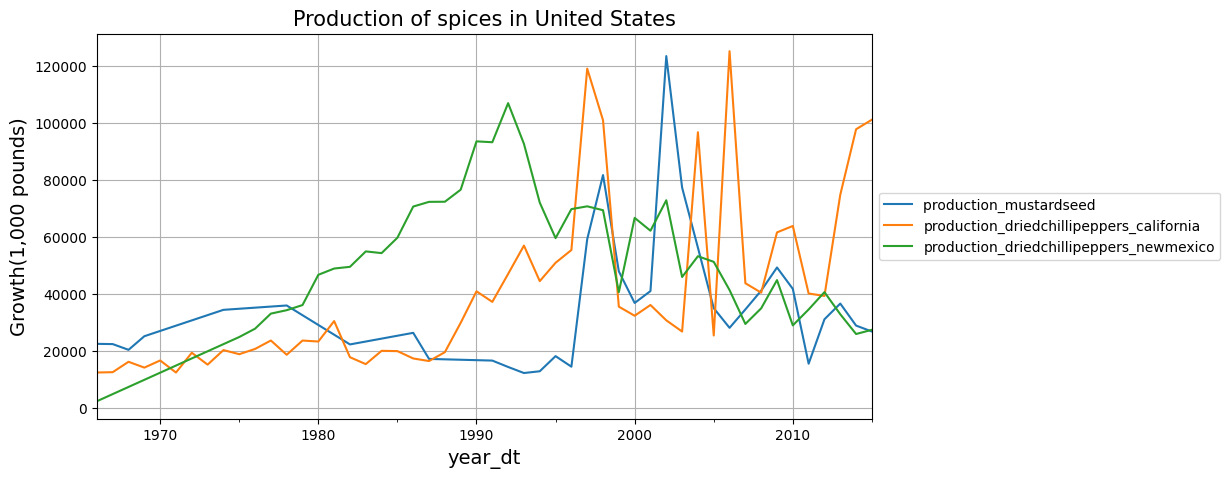

In [ ]:
spice_df.plot().legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.title("Production of spices in United States", fontsize=15)
plt.xlabel("year_dt", fontsize=14)
plt.ylabel("Growth(1,000 pounds)", fontsize=14)
plt.grid(True)
plt.show()


This is the graph representing the production of spices in United States 

*Next up im going to show you the graph that presents all spices imported into United States (notice: I cant create my final graph for imported spices if I dont repeat the code above)

In [ ]:
new_headers = [
    "year",
    "us_population",  
    "production_mustardseed ", 
    "production_driedchillipeppers_california",
    "production_driedchillipeppers_newmexico",
    "production_driedchillipeppers_total", 
    "totalproduction",
    "supply_imports_aniseseed",
    "supply_imports_carawayseed",
    "supply_imports_fennelseed",
    "supply_imports_Aniseseed,caraway seed,and fennel seed",
    "supply_imports_driedcapsicumpeppers",
    "supply_imports_cassia",
    "supply_imports_celeryseed",
    "supply_imports_cinnamon",
    "supply_imports_cloves",
    "supply_imports_corianderseed",
    "supply_imports_cuminseed",
    "supply_imports_gingerroot",
    "supply_imports_mace",
    "supply_imports_mustard",
    "supply_imports_mustardseed",
    "supply_imports_nutmeg",
    "supply_imports_paprika",
    "supply_imports_pepper,black,white",
    "supply_imports_poppyseed",
    "supply_imports_sage",
    "supply_imports_sesameseed",
    "supply_imports_turmeric",
    "supply_imports_vanillabeans",
    "supply_imports_otherspices",
    "supply_imports_total imports",
    "use_total",
    "use_exports",
    "use_Net Shipments To PuertoRico",
    "Food availability_total",
    "Food availability_percapita availability",
]

In [ ]:
spice_df = pd.read_excel(
    spice_path,  # The file we're loading up
    sheet_name="Spices",  # The sheet that we want to read this time
    skiprows=6,  # the number of rows to ignore at the top
    skipfooter=5,  # the number of rows to ignore at the top. It's just a coincidence that they're both  
    names=new_headers,  # the new column names
)
spice_df.head(7)

,year,us_population,production_mustardseed,production_driedchillipeppers_california,production_driedchillipeppers_newmexico,production_driedchillipeppers_total,totalproduction,supply_imports_aniseseed,supply_imports_carawayseed,supply_imports_fennelseed,...,supply_imports_sesameseed,supply_imports_turmeric,supply_imports_vanillabeans,supply_imports_otherspices,supply_imports_total imports,use_total,use_exports,use_Net Shipments To PuertoRico,Food availability_total,Food availability_percapita availability
0,1966,196.560,22603,12560.0,2500.0,15060.0,37663.0,266,7150,765,...,28202.0,3794.0,1852.0,8179.0,212749.0,250412.0,8053.0,608.0,241751.0,1.229909
1,1967,198.712,22520,12680.0,5000.0,17680.0,40200.0,548,6838,921,...,35854.0,1925.0,1282.0,7728.0,249499.0,289699.0,6365.0,813.0,282521.0,1.421761
2,1968,200.706,20512,16320.0,7500.0,23820.0,44332.0,369,7669,974,...,33993.0,3384.0,2160.0,7459.0,250154.0,294486.0,6792.0,1309.0,286385.0,1.426888
3,1969,202.677,25277,14280.0,10000.0,24280.0,49557.0,553,6435,923,...,38818.0,3126.0,1903.0,7124.0,246456.0,296013.0,6799.0,1263.0,287951.0,1.420738
4,1970,205.052,27126,16780.0,12500.0,29280.0,56406.0,350,7424,978,...,42661.0,4214.0,2239.0,9730.0,270597.0,327003.0,7956.0,1089.0,317958.0,1.550621
5,1971,207.661,28976,12560.0,15000.0,27560.0,56536.0,540,6099,1235,...,45442.0,3137.0,1855.0,7844.0,292257.0,348793.0,5575.0,1154.0,342064.0,1.647223
6,1972,209.896,30825,19480.0,17500.0,36980.0,67805.0,740,7292,1251,...,47220.0,3413.0,2366.0,9700.0,312211.0,380016.0,6730.0,1000.0,372286.0,1.773669


In [ ]:
spice_df["year_dt"] = pd.to_datetime(dict(year=spice_df.year, month=7, day=1))
spice_df.set_index("year_dt", inplace=True)
spice_df.head()

,year,us_population,production_mustardseed,production_driedchillipeppers_california,production_driedchillipeppers_newmexico,production_driedchillipeppers_total,totalproduction,supply_imports_aniseseed,supply_imports_carawayseed,supply_imports_fennelseed,...,supply_imports_sesameseed,supply_imports_turmeric,supply_imports_vanillabeans,supply_imports_otherspices,supply_imports_total imports,use_total,use_exports,use_Net Shipments To PuertoRico,Food availability_total,Food availability_percapita availability
year_dt,,,,,,,,,,,,,,,,,,,,,
1966-07-01,1966,196.560,22603,12560.0,2500.0,15060.0,37663.0,266,7150,765,...,28202.0,3794.0,1852.0,8179.0,212749.0,250412.0,8053.0,608.0,241751.0,1.229909
1967-07-01,1967,198.712,22520,12680.0,5000.0,17680.0,40200.0,548,6838,921,...,35854.0,1925.0,1282.0,7728.0,249499.0,289699.0,6365.0,813.0,282521.0,1.421761
1968-07-01,1968,200.706,20512,16320.0,7500.0,23820.0,44332.0,369,7669,974,...,33993.0,3384.0,2160.0,7459.0,250154.0,294486.0,6792.0,1309.0,286385.0,1.426888
1969-07-01,1969,202.677,25277,14280.0,10000.0,24280.0,49557.0,553,6435,923,...,38818.0,3126.0,1903.0,7124.0,246456.0,296013.0,6799.0,1263.0,287951.0,1.420738
1970-07-01,1970,205.052,27126,16780.0,12500.0,29280.0,56406.0,350,7424,978,...,42661.0,4214.0,2239.0,9730.0,270597.0,327003.0,7956.0,1089.0,317958.0,1.550621


In [ ]:
spice_df["year_dt"] = pd.to_datetime(dict(year=spice_df.year, month=7, day=1))
spice_df.drop(['year'], axis=1, inplace=True, errors="ignore")
spice_df.drop(['us_population'], axis=1, inplace=True, errors="ignore")
spice_df.drop(['production_driedchillipeppers_total'], axis=1, inplace=True, errors="ignore")
spice_df.drop(['totalproduction'], axis=1, inplace=True, errors="ignore")
spice_df.drop(['use_exports'], axis=1, inplace=True, errors="ignore")
spice_df.drop(['use_total'], axis=1, inplace=True, errors="ignore")
spice_df.drop(['use_Net Shipments To PuertoRico'], axis=1, inplace=True, errors="ignore")
spice_df.drop(['Food availability_total'], axis=1, inplace=True, errors="ignore")
spice_df.drop(['Food availability_percapita availability'], axis=1, inplace=True, errors="ignore")
spice_df.drop(['use_total'], axis=1, inplace=True, errors="ignore")
spice_df.set_index("year_dt", inplace=True)
spice_df.head() 

,production_mustardseed,production_driedchillipeppers_california,production_driedchillipeppers_newmexico,supply_imports_aniseseed,supply_imports_carawayseed,supply_imports_fennelseed,"supply_imports_Aniseseed,caraway seed,and fennel seed",supply_imports_driedcapsicumpeppers,supply_imports_cassia,supply_imports_celeryseed,...,supply_imports_nutmeg,supply_imports_paprika,"supply_imports_pepper,black,white",supply_imports_poppyseed,supply_imports_sage,supply_imports_sesameseed,supply_imports_turmeric,supply_imports_vanillabeans,supply_imports_otherspices,supply_imports_total imports
year_dt,,,,,,,,,,,,,,,,,,,,,
1966-07-01,22603,12560.0,2500.0,266,7150,765,NaN,14512.0,10583.0,2725.0,...,11890.0,37769.0,1926.0,6853.0,1481.0,28202.0,3794.0,1852.0,8179.0,212749.0
1967-07-01,22520,12680.0,5000.0,548,6838,921,NaN,14806.0,8523.0,3116.0,...,11726.0,56142.0,882.0,6665.0,2191.0,35854.0,1925.0,1282.0,7728.0,249499.0
1968-07-01,20512,16320.0,7500.0,369,7669,974,NaN,15063.0,8966.0,3790.0,...,12863.0,53092.0,1022.0,8073.0,2687.0,33993.0,3384.0,2160.0,7459.0,250154.0
1969-07-01,25277,14280.0,10000.0,553,6435,923,NaN,13413.0,7895.0,2966.0,...,11429.0,54000.0,949.0,5426.0,2583.0,38818.0,3126.0,1903.0,7124.0,246456.0
1970-07-01,27126,16780.0,12500.0,350,7424,978,NaN,14010.0,4801.0,4018.0,...,12665.0,47847.0,1565.0,6593.0,2336.0,42661.0,4214.0,2239.0,9730.0,270597.0


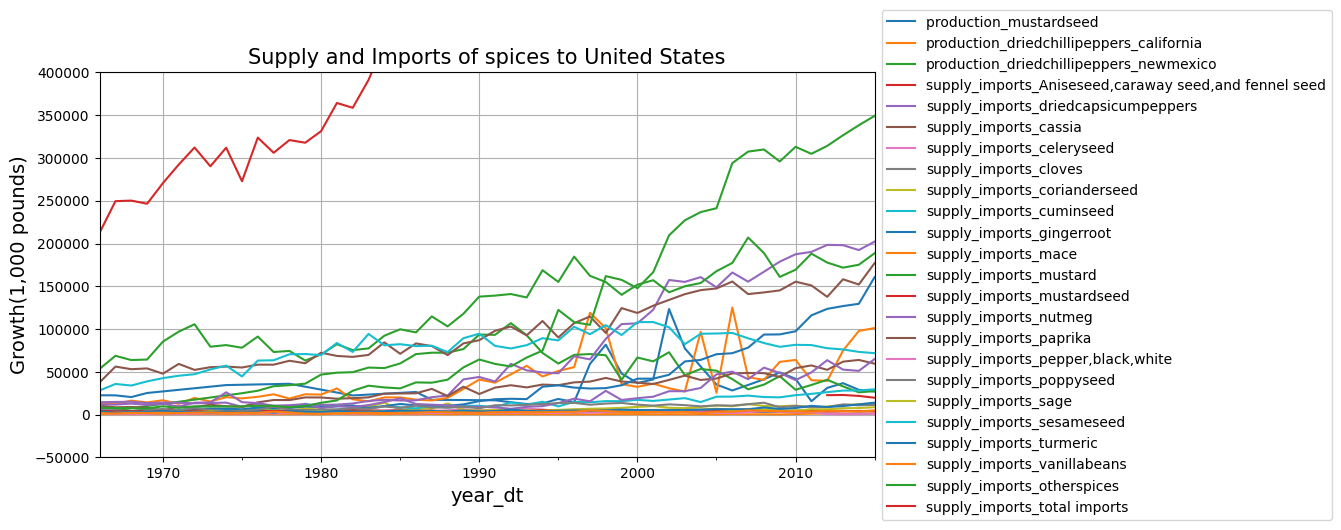

In [ ]:
spice_df.plot(ylim=(-50000,400000)).legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.title("Supply and Imports of spices to United States", fontsize=15)
plt.xlabel("year_dt", fontsize=14)
plt.ylabel("Growth(1,000 pounds)", fontsize=14)
plt.grid(True)
plt.show()

The graph above is showing us all the spices that are being imported into United States between 1966 - 2015

Now I am going to make a pie chart that categorises each spice into where it orignates from: 

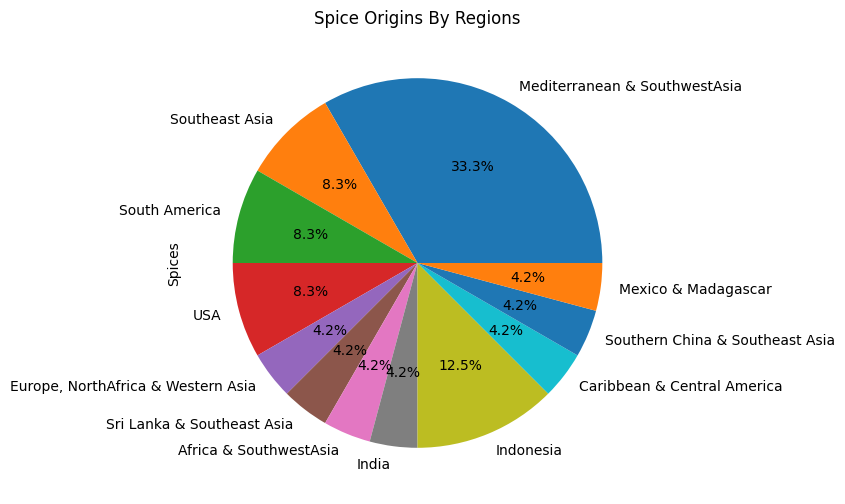

In [ ]:
data = {'Origins': ['Mediterranean & SouthwestAsia', 'Southeast Asia', 'South America', 'USA', 'Europe, NorthAfrica & Western Asia', 'Sri Lanka & Southeast Asia', 'Africa & SouthwestAsia', 'India', 'Indonesia', 'Caribbean & Central America', 'Southern China & Southeast Asia', 'Mexico & Madagascar'],
        'Spices': [120, 30, 30, 30, 15, 15, 15, 15, 45, 15, 15, 15]}
df = pd.DataFrame(data)

plt.figure(figsize=(10,6))
df['Spices'].plot(kind='pie', labels=df['Origins'], autopct='%1.1f%%')
plt.title('Spice Origins By Regions')
plt.show()

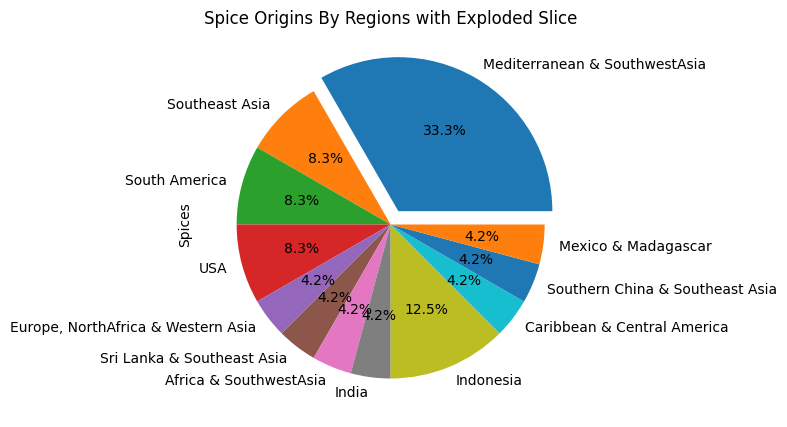

In [ ]:
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 )  # explode 1st slice
df['Spices'].plot(kind='pie', labels=df['Origins'], autopct='%1.1f%%', explode=explode)
plt.title('Spice Origins By Regions with Exploded Slice')
plt.show()

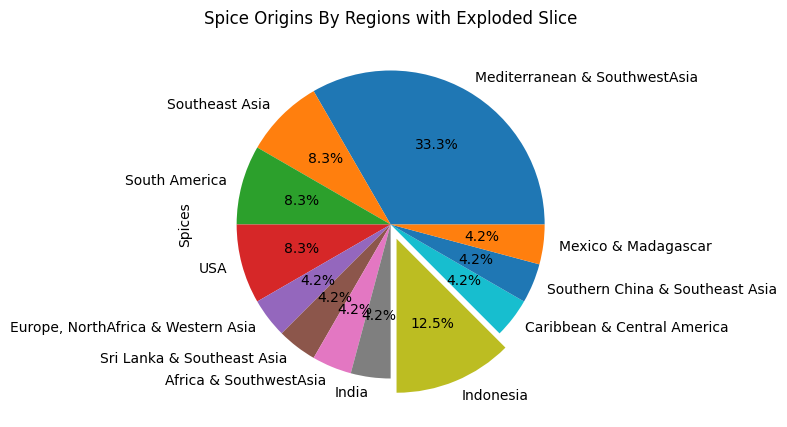

In [ ]:
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0, 0, 0)  # explode 1st slice
df['Spices'].plot(kind='pie', labels=df['Origins'], autopct='%1.1f%%', explode=explode)
plt.title('Spice Origins By Regions with Exploded Slice')
plt.show()

In [ ]:
df = pd.DataFrame({'Mediterranean & Southwest Asia': ['Mustard seed', 'Anise seed', 'Fennel seed', 'Coriander seed', 'Cumin seed', 'Celery seed', 'Poppy seed', 'Sage'],
                 'Indonesia': ['Cloves', 'Mace', 'Nutmeg'] + [''] * 5  # Pad with empty strings
})

print(df)

  Mediterranean & Southwest Asia Indonesia
0                   Mustard seed    Cloves
1                     Anise seed      Mace
2                    Fennel seed    Nutmeg
3                 Coriander seed          
4                     Cumin seed          
5                    Celery seed          
6                     Poppy seed          
7                           Sage          
